# Earth

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import importlib
import seaborn as sns

## Read in all data

In [15]:
# Mallama et al. 2017 Johnson Cousins filters 
mallama= np.genfromtxt('Earth_geoalbedo_Mallama2017.txt')
# Roberge et al. 2017 synthetic SMART data for each SS planet
roberge_model_data= pd.read_csv('Roberge2017_geometricalbedo_allplanets.csv')
#livengood et al 2011 fig 8
livengood_2= pd.read_csv('livengood_fig4_part2.csv')
livengood_1= pd.read_csv('livengood_fig4_part1.csv')
# robinson 2011 fig 2a
robinson= pd.read_csv('robinson_2011_fig2a.csv')
# PSG Kofman Data set- Resolving power= 750
kofman750=np.genfromtxt('psg_rad_earth_kofman_RP750.txt')
# DSCOVR data from Vincent Kofman
dscvr = pd.read_csv('dscovr_pix_original.txt')

In [7]:
# To convert to phase angle= 0 use the lambertian phase integral (PSG eqn 77) to simulate full disk view
def get_scale_factor_lambert(phase_angle): # phase angle in degrees
    scale_val= (1/np.pi)*(np.sin(np.deg2rad(phase_angle))+(np.pi-np.deg2rad(phase_angle))*np.cos(np.deg2rad(phase_angle)))
    return scale_val

In [8]:
cb_palette= sns.color_palette("colorblind")

In [9]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

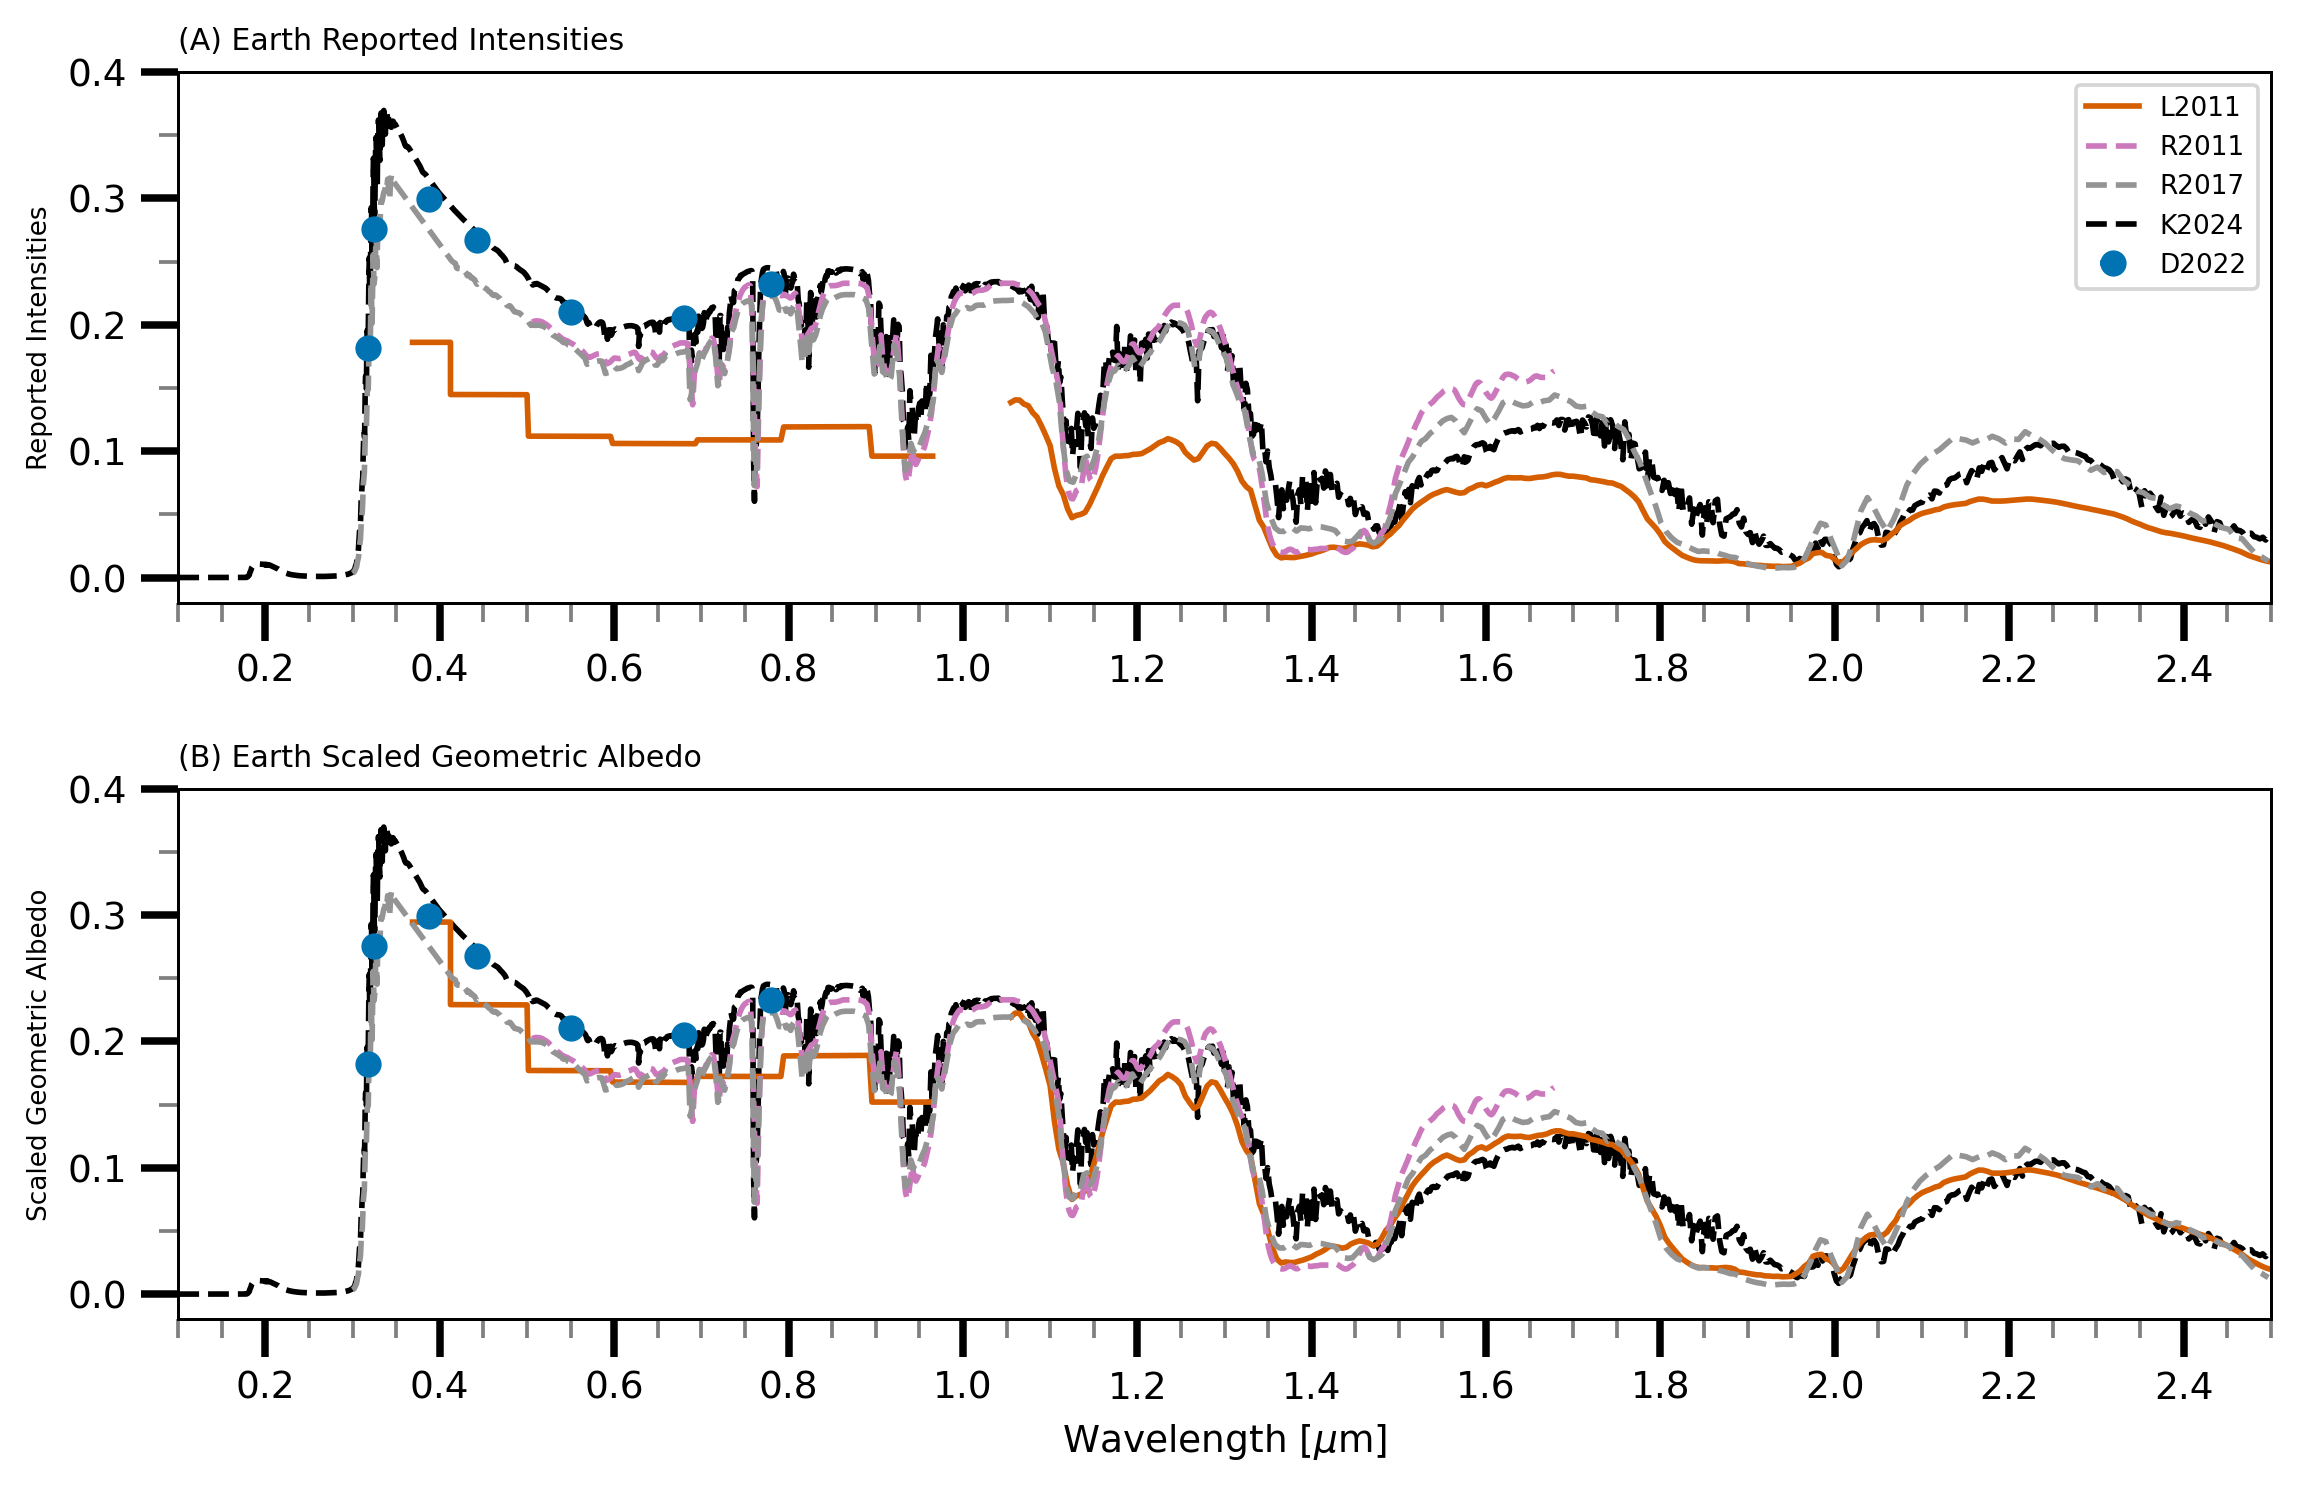

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), dpi=270)
plt.subplots_adjust(hspace=0.35)

# ORIGINAL INTENSITIES
axes[0].plot(livengood_1['x'],livengood_1['y'],color=cb_palette[3])
axes[0].plot(livengood_2['x'],livengood_2['y'], label='L2011',color=cb_palette[3])
axes[0].plot(robinson['x'], robinson['y'], label='R2011',color=cb_palette[4], linestyle='--')
axes[0].plot(roberge_model_data['Wavelength [$\\mu$m]'], roberge_model_data['Earth'], label='R2017', color=cb_palette[-3], linestyle='--')
axes[0].errorbar(dscvr.iloc[:,0]/1000,np.mean(dscvr.iloc[:,2:],axis=1),xerr=dscvr.iloc[:,1]/1000, fmt='o',label='D2022',color=cb_palette[0])  
axes[0].plot(kofman750[:,0],kofman750[:,1],label='K2024', color='black', linestyle='--', zorder=0)
# axes[0].plot(cloud.iloc[:,0]/1000,np.mean(cloud.iloc[:,1:],axis=1),label='Day Average (PSG) (OLD VERSION)', color=cb_palette[-1], linestyle='-.')
# axes[0].plot(cloud.iloc[:,0]/1000,np.mean(cloud.iloc[:,1:],axis=1)-np.std(cloud.iloc[:,1:],axis=1),label='Standard Deviation (PSG) (OLD VERSION)', color=cb_palette[-1], linestyle='--', alpha=0.6, linewidth=0.8)
# axes[0].plot(cloud.iloc[:,0]/1000,np.mean(cloud.iloc[:,1:],axis=1)+np.std(cloud.iloc[:,1:],axis=1), color=cb_palette[-1], linestyle='--', alpha=0.6, linewidth=0.8)

# SCALED DATA
axes[1].plot(livengood_1['x'],livengood_1['y']/get_scale_factor_lambert(57.7),color=cb_palette[3])
axes[1].plot(livengood_2['x'],livengood_2['y']/get_scale_factor_lambert(57.7), label='L2011',color=cb_palette[3])
axes[1].plot(robinson['x'], robinson['y'], label='R2011',color=cb_palette[4], linestyle='--')
axes[1].plot(roberge_model_data['Wavelength [$\\mu$m]'], roberge_model_data['Earth'], label='R2017', color=cb_palette[-3], linestyle='--')
axes[1].errorbar(dscvr.iloc[:,0]/1000,np.mean(dscvr.iloc[:,2:],axis=1),xerr=dscvr.iloc[:,1]/1000, fmt='o',label='D2022',color=cb_palette[0])  
axes[1].plot(kofman750[:,0],kofman750[:,1],label='K2024', color='black', linestyle='--', zorder=0)

for value in range(2):
    # Keeping the tick marks consistent across the plots
    axes[value].xaxis.set_major_locator(MultipleLocator(0.2))
    axes[value].xaxis.set_minor_locator(MultipleLocator(0.05))
    axes[value].yaxis.set_major_locator(MultipleLocator(0.1))
    axes[value].yaxis.set_minor_locator(MultipleLocator(0.05))
    # Customize the appearance of ticks
    axes[value].tick_params(axis='both', which='major', length=10, width=2, color='black')
    axes[value].tick_params(axis='both', which='minor', length=5, width=1, color='gray')
    #axes[value].set_xlim(0.2,max(meadows['x']))
    axes[value].set_ylim(-0.02,0.4)
    axes[value].set_xlim(0.1,2.5)

axes[0].set_title('(A) Earth Reported Intensities', fontsize=8, loc='left')
axes[1].set_title('(B) Earth Scaled Geometric Albedo', fontsize=8, loc='left')
axes[0].set_ylabel('Reported Intensities', fontsize=7)
#axes[1].set_ylabel('Intensities Scaled to Phase Zero Degrees', fontsize=7)
axes[1].set_ylabel('Scaled Geometric Albedo', fontsize=7)
axes[1].set_xlabel('Wavelength [$\mu$m]')
axes[0].legend(fontsize=7, loc='upper right') #, fancybox=True, shadow=True); #bbox_to_anchor=(0.7, 0.7),
plt.savefig('final_plots/Earth_double_plot.png', bbox_inches='tight');

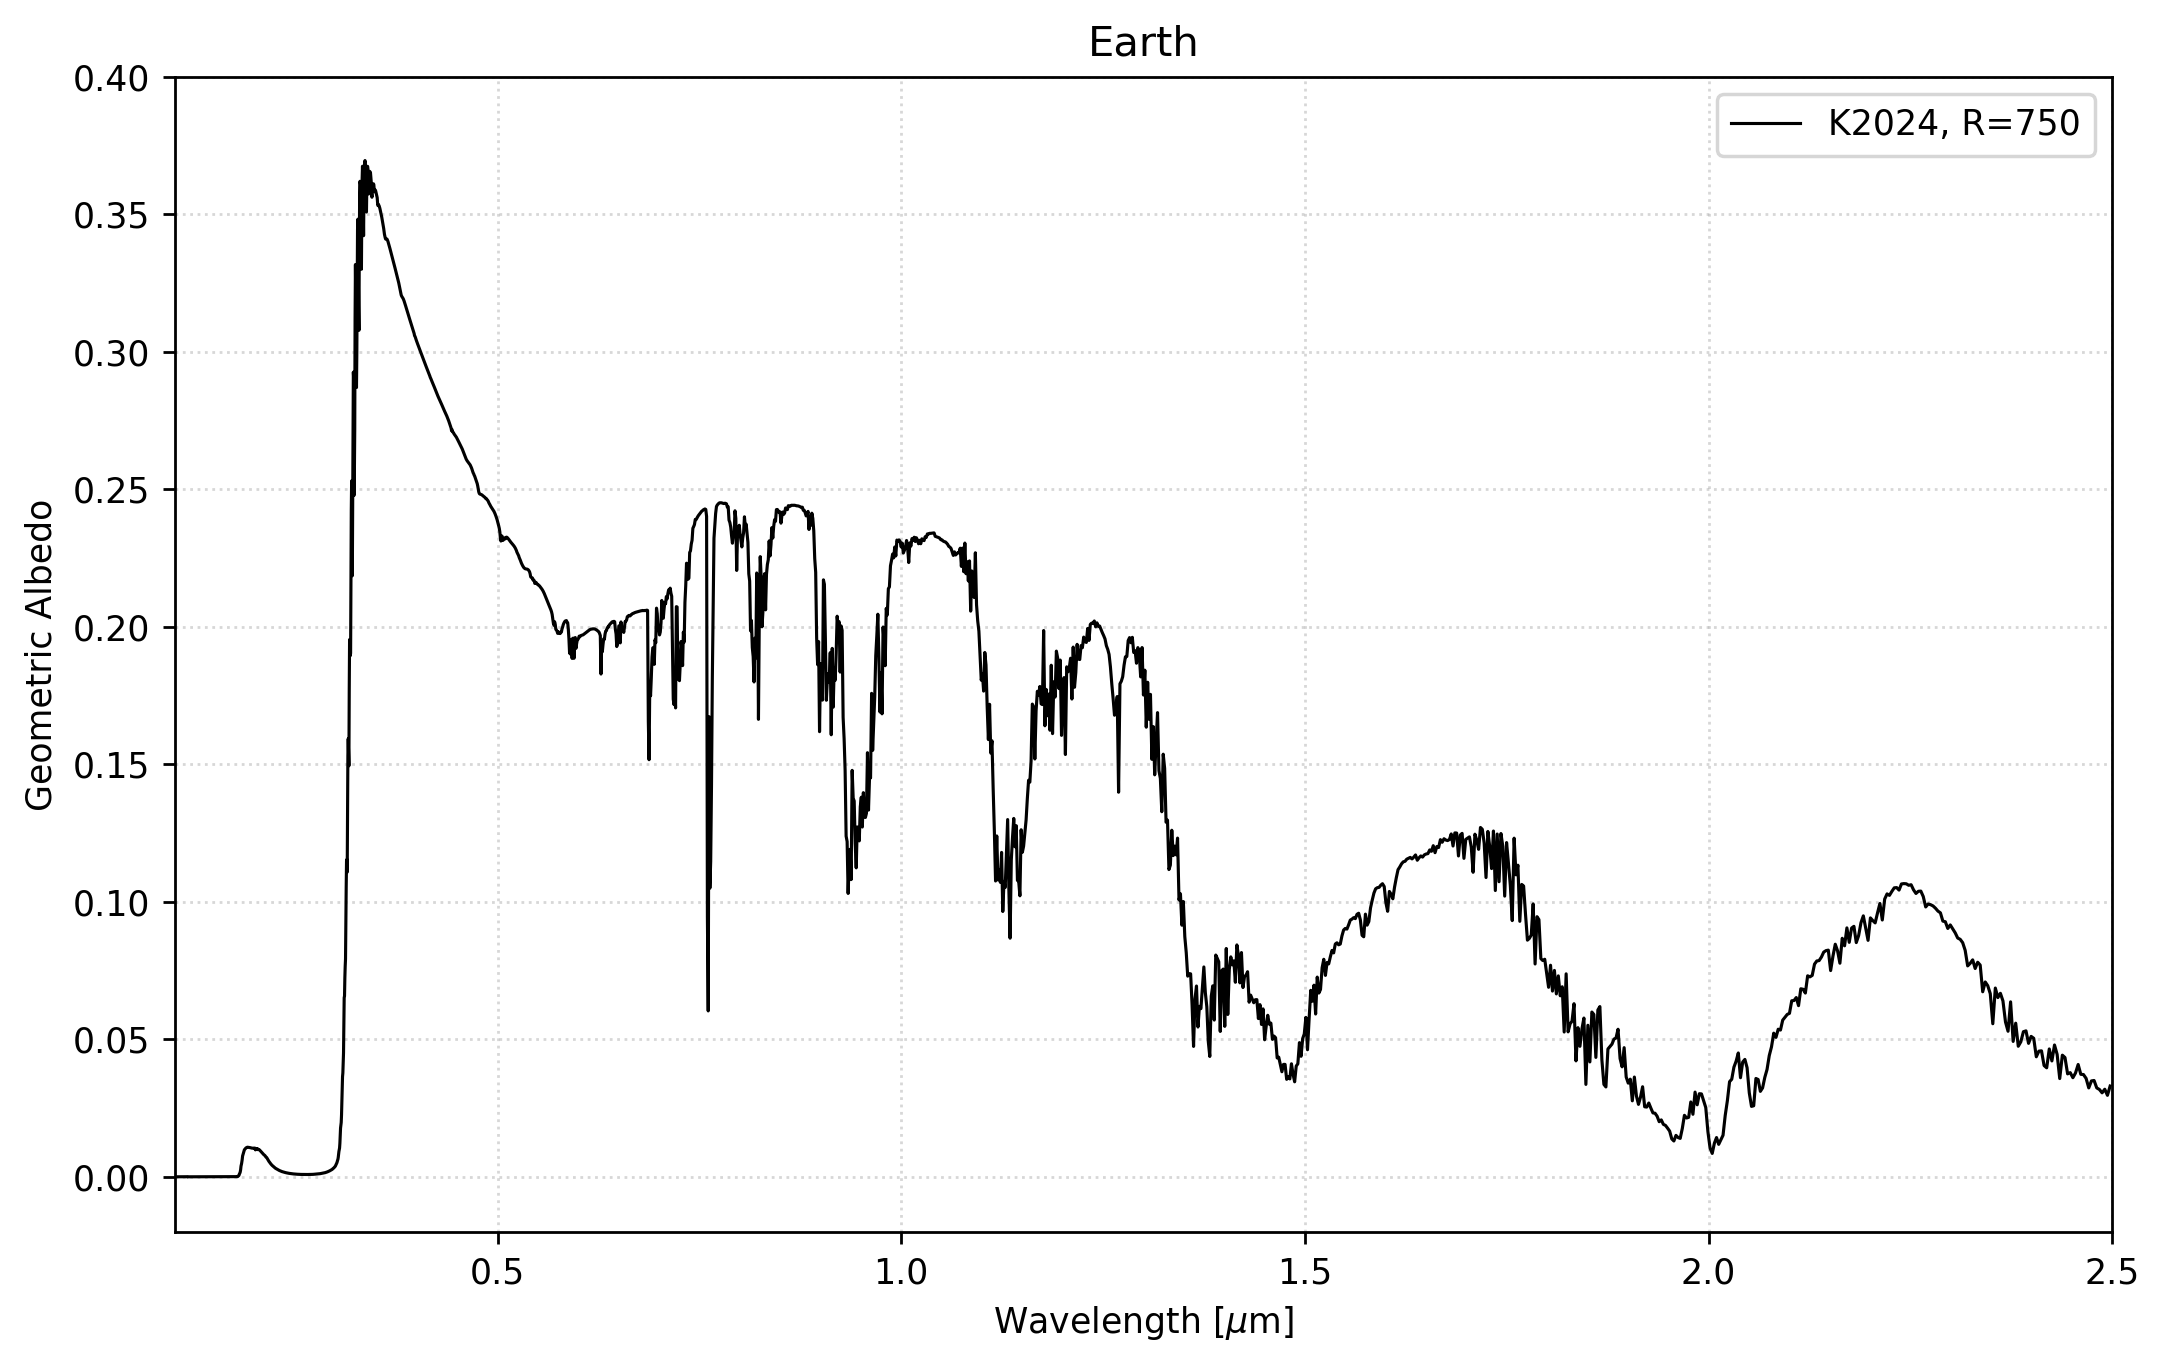

In [24]:
plt.figure(figsize=(10,6), dpi=250)

#plt.errorbar(dscvr.iloc[:,0]/1000,np.mean(dscvr.iloc[:,2:],axis=1),xerr=dscvr.iloc[:,1]/1000, fmt='o',label='DSCOVR',color=cb_palette[0])  
plt.plot(kofman750[:,0],kofman750[:,1],label='K2024, R=750', color='black', linewidth=0.9)
#plt.plot(kofman400[:,0],kofman400[:,1],label='K2024 Resolving Power=400', color='red', alpha=0.3)

plt.grid(linestyle='dotted', alpha=0.5)
plt.legend()

plt.ylim(-0.02,0.4)
#plt.xlim(courtin_a['x'].min(),irwin_irtf['x'].max())
plt.xlim(0.1,2.5)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Geometric Albedo')
plt.title('Earth')
plt.savefig('final_plots/earth_composite.png', bbox_inches="tight");